In [1]:
import requests
import torch
from diffusers import StableDiffusionDepth2ImgPipeline
from PIL import Image

pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda")



/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Loading pipeline components...: 100%|██████████| 7/7 [00:17<00:00,  2.44s/it]


StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.25.1",
  "_name_or_path": "stabilityai/stable-diffusion-2-depth",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

In [2]:
from dsd import DATA_DIR
render_path = DATA_DIR / "renders/mugs/close"
rgb_image = Image.open(render_path / "rgb.png")
depth_image = Image.open(render_path / "depth_image.png")



In [3]:
import numpy as np 

depth_image = np.array(depth_image)
depth_image = depth_image.astype(np.float32)
depth_image = depth_image / 255.0
dept_image = 1 - depth_image
# normalize
depth_image = (depth_image - depth_image.min()) / (depth_image.max() - depth_image.min())
depth_image = depth_image * 255.0
depth_image = Image.fromarray(depth_image)
depth_image = depth_image.convert("RGB")

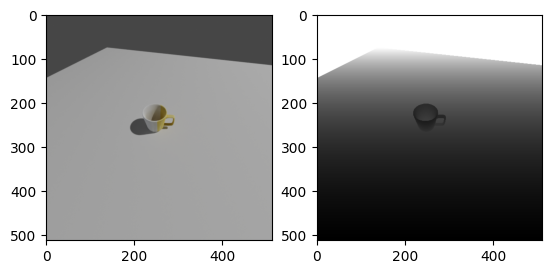

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.subplot(1, 2, 1)
plt.imshow(rgb_image)
plt.subplot(1, 2, 2)
plt.imshow(depth_image)


In [33]:
# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# init_image = Image.open(requests.get(url, stream=True).raw)

prompt = "a rainbow mug"
n_propmt = "bad, deformed, ugly, bad anotomy"

rgb = np.array(rgb_image).transpose(2, 0, 1)[:3,...]
rgb = torch.from_numpy(rgb).unsqueeze(0)
# depth map is created automatically with MIDAS, unless you provide one.
images = pipe(prompt=prompt, image=rgb, negative_prompt=n_propmt, strength=0.7, guidance_scale=4.0, num_images_per_prompt=4).images


/home/tlips/.conda/envs/dsd/lib/python3.10/site-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_depth2img.py:513: FutureWarning: You have passed 4 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 64, 64])
torch.Size([1, 3, 512, 512])
torch.Size([1, 3, 64, 64])


100%|██████████| 35/35 [00:04<00:00,  7.18it/s]


Text(0.5, 1.0, 'prompted')

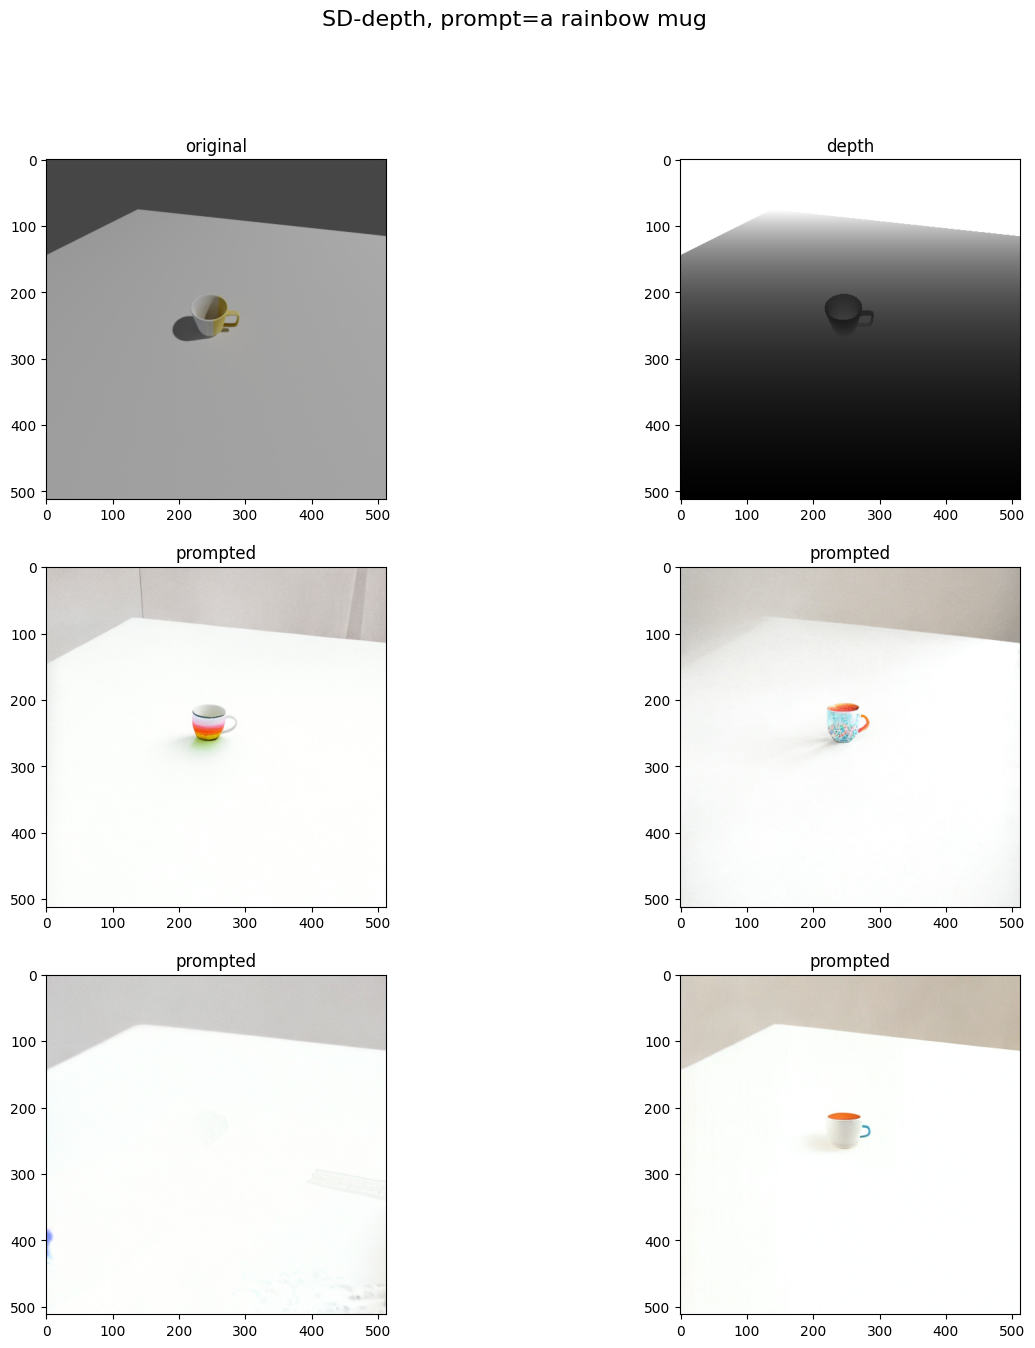

In [34]:
import matplotlib.pyplot as plt

# create a grid of 2x2 images
fig, ax = plt.subplots(3,2)
# increase size of the figures
fig.set_figheight(15)
fig.set_figwidth(15)
# set title of the figure
fig.suptitle(f"SD-depth, prompt={prompt}", fontsize=16)
ax[0,0].imshow(rgb_image)
ax[0,0].set_title("original")
ax[0,1].imshow(depth_image)
ax[0,1].set_title("depth")
ax[1,0].imshow(images[0])
ax[1,0].set_title("prompted")
ax[1,1].imshow(images[1])
ax[1,1].set_title("prompted")
ax[2,0].imshow(images[2])
ax[2,0].set_title("prompted")
ax[2,1].imshow(images[3])
ax[2,1].set_title("prompted")
